In [ ]:
from google.colab import output
output.enable_custom_widget_manager()


In [ ]:
!pip install tensorflow tensorflow-hub ipywidgets ipywebrtc opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0


In [ ]:
!wget -P /content/ https://img.freepik.com/fotos-gratis/colegas-de-tiro-medio-tirando-selfie_23-2149008996.jpg
!mv /content/colegas-de-tiro-medio-tirando-selfie_23-2149008996.jpg /content/foto.jpg

--2024-12-20 13:49:40--  https://img.freepik.com/fotos-gratis/colegas-de-tiro-medio-tirando-selfie_23-2149008996.jpg
Resolving img.freepik.com (img.freepik.com)... 23.54.155.168, 23.54.155.165, 2600:1413:5000:25::1738:6124, ...
Connecting to img.freepik.com (img.freepik.com)|23.54.155.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69243 (68K) [image/jpeg]
Saving to: ‘/content/colegas-de-tiro-medio-tirando-selfie_23-2149008996.jpg’

colegas-de-tiro-med 100%[===================>]  67.62K   170KB/s    in 0.4s    

2024-12-20 13:49:41 (170 KB/s) - ‘/content/colegas-de-tiro-medio-tirando-selfie_23-2149008996.jpg’ saved [69243/69243]



In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Carregar o modelo pré-treinado do TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

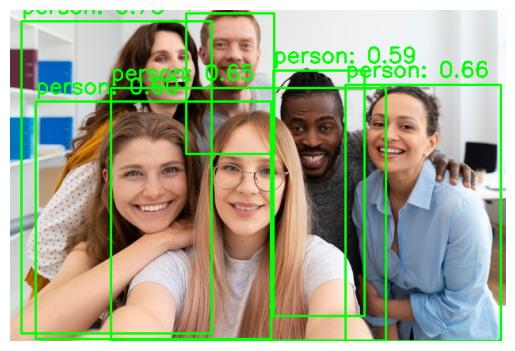

In [ ]:
# Lista de classes do modelo COCO
COCO_CLASSES = [
    "background", "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train",
    "truck", "boat", "traffic light", "fire hydrant", "unknown", "stop sign",
    "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "unknown", "backpack", "umbrella", "unknown",
    "unknown", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
    "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
    "bottle", "unknown", "wine glass", "cup", "fork", "knife", "spoon", "bowl",
    "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza",
    "donut", "cake", "chair", "couch", "potted plant", "bed", "unknown", "dining table",
    "unknown", "unknown", "toilet", "unknown", "tv", "laptop", "mouse", "remote",
    "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "unknown",
    "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"
]

# Função para detectar faces na imagem
def detect_faces_in_image(image_path, detector):
    img = Image.open(image_path)
    img = np.array(img)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    input_tensor = tf.convert_to_tensor(img_rgb)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detector(input_tensor)
    detections = {key: value[0].numpy() for key, value in detections.items()}

    # Iterar sobre todas as detecções
    for i in range(detections['detection_scores'].shape[0]):
        score = detections['detection_scores'][i]
        if score >= 0.5:  # Limiar de confiança
            box = detections['detection_boxes'][i]
            class_id = int(detections['detection_classes'][i])
            class_name = COCO_CLASSES[class_id]
            h, w, _ = img.shape
            ymin, xmin, ymax, xmax = box
            (left, right, top, bottom) = (int(xmin * w), int(xmax * w), int(ymin * h), int(ymax * h))
            cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
            # Adicionar texto com a etiqueta de classe e a pontuação de confiança
            cv2.putText(img, f'{class_name}: {score:.2f}', (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    return img

# Processar a imagem carregada
image_path = '/content/foto.jpg'  # Substitua pelo nome do seu arquivo carregado
result_img = detect_faces_in_image(image_path, detector)

# Exibir a imagem resultante
plt.imshow(result_img)
plt.axis('off')
plt.show()


In [65]:
!rm -rf dataset/faces/
import cv2
import os

def extract_faces(original_dataset_path,faces_dataset_path):

  # Criar diretórios de destino se não existirem
  if not os.path.exists(faces_dataset_path):
      os.makedirs(faces_dataset_path)

  # Inicializar o classificador de Haar cascades
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  for person_name in os.listdir(original_dataset_path):

      if os.path.basename(person_name).startswith('.') :
         continue

      person_path = os.path.join(original_dataset_path, person_name)
      if not os.path.isdir(person_path):
         continue

      face_person_path = os.path.join(faces_dataset_path, person_name)
      print ('extract',face_person_path)
      if not os.path.exists(face_person_path):
          os.makedirs(face_person_path)
      print(person_path)
      for img_name in os.listdir(person_path):

          if img_name.startswith('.') :
             continue
          print ('extract',img_name)
          img_path = os.path.join(person_path, img_name)
          img = cv2.imread(img_path)
          gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
          faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

          for i, (x, y, w, h) in enumerate(faces):
              face_img = img[y:y+h, x:x+w]
              face_img_path = os.path.join(face_person_path, f"{i}_{img_name}")
              cv2.imwrite(face_img_path, face_img)


extract_faces('dataset/img/','dataset/faces/')


extract dataset/faces/adam
dataset/img/adam
extract 99s.jpeg
extract 62.jpeg
extract 64.jpeg
extract 93.jpeg
extract 91.jpg
extract 63.jpeg
extract 61.jpg
extract 94.jpeg
extract 60.jpeg
extract dataset/faces/will
dataset/img/will
extract 52.jpeg
extract 53.jpg
extract 3.jpeg
extract 55.jpg
extract 50.jpeg
extract 2.jpeg
extract 1.jpeg
extract 54.jpg
extract 4.jpeg
extract dataset/faces/marcelo
dataset/img/marcelo
extract WIN_20241220_14_30_31_Pro.jpg
extract WIN_20241220_14_30_35_Pro.jpg
extract WIN_20241220_14_30_33_Pro.jpg
extract WIN_20241220_14_30_37_Pro.jpg
extract WIN_20241220_14_30_27_Pro.jpg
extract WIN_20241220_14_30_30_Pro.jpg
extract WIN_20241220_14_30_34_Pro.jpg
extract WIN_20241220_14_30_36_Pro.jpg
extract WIN_20241220_14_30_32_Pro.jpg


In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

# Caminho da pasta contendo as imagens
dataset_path = 'dataset/faces/'

# Parâmetros de pré-processamento e aumento de dados
img_height, img_width = 224, 224
batch_size = 32

# Função para verificar e ignorar diretórios ocultos
def is_not_hidden(path):
    return not os.path.basename(path).startswith('.')

class CustomImageDataGenerator(ImageDataGenerator):
    def _iter_valid_files(self, directory, white_list_formats, follow_links):
        for root, _, files in os.walk(directory, followlinks=follow_links):
            for fname in sorted(files):
                if is_not_hidden(root):
                    for extension in white_list_formats:
                        if fname.lower().endswith('.' + extension):
                            yield root, fname

# Aplicar aumento de dados com o gerador de dados personalizado
datagen = CustomImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Certifique-se de que seja 'categorical'
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Certifique-se de que seja 'categorical'
    subset='validation'
)

# Verificar as formas dos dados
for data_batch, labels_batch in train_generator:
    print("Forma dos dados:", data_batch.shape)
    print("Forma dos rótulos:", labels_batch.shape)
    break  # Apenas para verificar a primeira batch

# Definir a arquitetura do modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Número de classes = 3
])

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
epochs = 50  # Aumentar o número de épocas devido ao conjunto de dados pequeno
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Salvar o modelo treinado
model.save('my_three_class_model.h5')


Found 20 images belonging to 3 classes.
Found 4 images belonging to 3 classes.
Forma dos dados: (20, 224, 224, 3)
Forma dos rótulos: (20, 3)
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3000 - loss: 1.1026 - val_accuracy: 0.5000 - val_loss: 7.0171
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.4000 - loss: 6.7205 - val_accuracy: 0.2500 - val_loss: 5.8601
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.2500 - loss: 4.6206 - val_accuracy: 0.2500 - val_loss: 5.0902
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 0.3500 - loss: 5.5876 - val_accuracy: 0.2500 - val_loss: 2.7891
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5000 - loss: 3.3770 - val_accuracy: 0.5000 - val_loss: 1.2244
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step - accuracy: 0.4000 - loss: 1.6869 - val_accuracy: 0.5000 - val_loss: 1.4326
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.3500 - loss: 2.0972 - val_accuracy: 0.5000

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,781 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


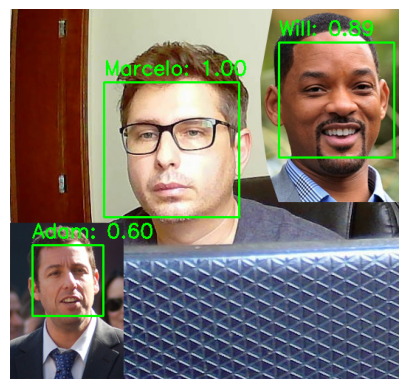

In [75]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Carregar o modelo salvo no formato .h5
model_path = '/content/my_three_class_model.h5'  # Substitua pelo caminho do seu modelo
model = tf.keras.models.load_model(model_path)

# Ver a estrutura do modelo
model.summary()

# Função para carregar e pré-processar a imagem
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Redimensionar para o tamanho esperado pelo modelo
    img = np.array(img)
    img = img / 255.0  # Normalizar a imagem
    img = np.expand_dims(img, axis=0)  # Adicionar dimensão de batch
    return img

# Função para detectar faces na imagem usando Haar cascades
def detect_faces(img):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

# Função para desenhar bounding boxes nas faces detectadas
def draw_bounding_boxes(img, faces, class_names, predictions):
    h, w, _ = img.shape
    for (x, y, w, h), pred in zip(faces, predictions):
        pred = pred[0]  # Acessar a lista interna
        class_id = np.argmax(pred)
        if class_id >= len(class_names):
            print(f"IndexError: Class id {class_id} out of range for class names length {len(class_names)}")
            continue  # Pular esta detecção se o índice estiver fora do intervalo
        class_name = class_names[class_id]
        score = pred[class_id]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f'{class_name}: {score:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return img

#inicia
def start(image_path):

    # Carregar a imagem para detecção
    original_image = cv2.imread(image_path)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Detectar faces na imagem original
    faces = detect_faces(original_image)

    # Carregar e pré-processar cada face detectada para classificação
    predictions = []
    for (x, y, w, h) in faces:
        face_img = original_image_rgb[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (224, 224))
        face_img = face_img / 255.0
        face_img = np.expand_dims(face_img, axis=0)
        pred = model.predict(face_img)
        predictions.append(pred)

    # Definir os nomes das classes (ajustar conforme necessário)
    class_names = ["Adam","Marcelo","Will"]

    # Desenhar bounding boxes nas faces detectadas com o nome da classe prevista
    result_img = draw_bounding_boxes(original_image_rgb, faces, class_names, predictions)

    # Exibir a imagem resultante com as bounding boxes
    plt.imshow(result_img)
    plt.axis('off')
    plt.show()

start('/content/teste.jpg')


In [26]:
import IPython.display as display
from IPython.display import Javascript
from google.colab import output
import cv2
import numpy as np
import PIL
from PIL import Image
import io
from base64 import b64decode, b64encode


In [27]:
def capture_image():
    js = Javascript('''
    async function capture() {
        const div = document.createElement('div');
        const video = document.createElement('video');
        const canvas = document.createElement('canvas');
        const button = document.createElement('button');
        button.textContent = 'Capture Image';

        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        div.appendChild(video);
        div.appendChild(canvas);
        div.appendChild(button);
        document.body.appendChild(div);
        video.srcObject = stream;
        await video.play();

        button.onclick = () => {
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            google.colab.kernel.invokeFunction('notebook.save_image', [canvas.toDataURL()], {});
        };
    }
    capture();
    ''')

    display.display(js)


In [28]:
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
    return bbox_bytes


<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


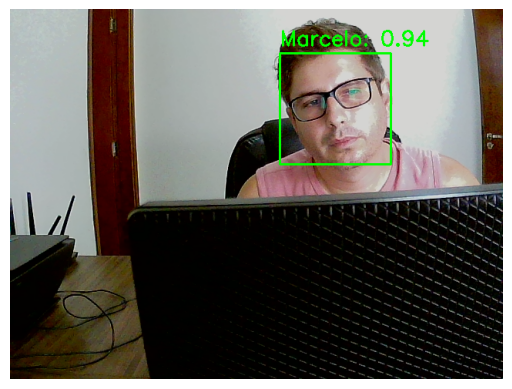

In [81]:
from google.colab import output

def save_image(data):
    img = js_to_image(data)
    image_path = '/content/captured_image.png'
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img_pil.save(image_path)
    start('/content/captured_image.png')

output.register_callback('notebook.save_image', save_image)

capture_image()
